# One Sample T-Test - Lab

## Introduction
Just as you previously used the t-distribution to provide confidence intervals for estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a one sample t-test and make conclusions about an experiment based on the results

### Exercise 1: 

Create a function in Python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value, and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using `seaborn` of the distribution to check for normality.

In [ ]:
# Given Template

def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 

    
    # Population mean 

    # Sample mean (x̄) using NumPy mean()

    # Sample Standard Deviation (sigma) using Numpy
    
    # Degrees of freedom
    
    # Calculate the critical t-value
    
    # Calculate the t-value and p-value      
    
    # return results
    return None

In [40]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import math
from scipy import stats
from scipy.stats import t

In [41]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    #sns.distplot(sample)
    
    # Population mean 

    # Sample mean (x̄) using NumPy mean()
    x_bar = sample.mean()
    
    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample, ddof=1)
    
    # Degrees of freedom
    d_of_f = len(sample) - 1
    
    # Calculate the critical t-value
    t_stat = (x_bar -  popmean)/(sigma/np.sqrt(len(sample)))
    print("The t-statistic is", np.round(t), 2)
    
    # Calculate the t-value and p-value      
    t_crit = stats.t.ppf(1 - 0.05, df=19)
    print("The critical t-value is", t_crit)
    
    # p-value
    results = stats.ttest_1samp(a= sample, popmean= popmean)
    
    # return results
    if (results[0] > t_crit) and (results[1] < alpha):
        print("Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(results[0], 2), "and p-value =", np.round((results[1]), 4))
    else:
        print("Null hypothesis is Accepted")

In [43]:
def one_sample_ttest(sample, popmean, alpha):
    
# Population mean (μ)
    mu = popmean 

# Sample mean (x̄) using NumPy mean()
    x_bar = np.round(sample.mean(),2)

# Sample Stadrad Deviation (sigma) using Numpy
    sigma = np.round(np.std(sample,ddof=1),2)
    
# Sample size (n)
    n = len(sample)

# Degrees of Freedom
    df = n-1

# Difference in sample mean 
    diff = np.round(x_bar - mu, 2)


# Print the findings
    print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation (sigma) = ", sigma, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)

    
    t = (x_bar -  mu)/(sigma/np.sqrt(n))
    print("The t-stat is:", np.round(t, 2))
    
    t_crit = np.round(stats.t.ppf(1 - 0.05, df=19), 2)
    print("The critical t-value is:", t_crit)
    
    

### Exercise 2:

Use the function created in Exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online-course on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternative hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t- and p-values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

In [44]:
online_student_sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])
class_average = 65
a = 0.05

one_sample_ttest(online_student_sample, class_average, a)

The sample contains 20 observations, having a mean of 81.8 and a standard deviation (sigma) =  5.92 , with 19 degrees of freedom. The difference between sample and population means is: 16.8
The t-stat is: 12.69
The critical t-value is: 1.73


In [ ]:
# So with a 95% confidence level, we have about 1.73% in the each tail?

In [27]:
online_student_sample_2 = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])


In [32]:
# Effect size
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    print("Cohen's effect size is:", d)

In [33]:
Cohen_d(online_student_sample, online_student_sample_2)

Cohen's effect size is: 0.08960343257970732


In [ ]:
# That looks pretty small!

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 

In [24]:
# Their code
from scipy import stats
import numpy as np
import seaborn as sns
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(12,10)})
    sns.distplot(sample)
    
    # Population mean 
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    x_bar= sample.mean()

    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample)
    
    # Degrees of freedom
    df = len(sample) - 1
    
    #Calculate the critical t-value
    t_crit = stats.t.ppf(1 - alpha, df=df)
    
    #Calculate the t-value and p-value
    results = stats.ttest_1samp(a= sample, popmean= mu)         
    
    if (results[0]>t_crit) and (results[1]<alpha):
        print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
                round(results[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((results[1]), 12))
    else:
        print ("Null hypothesis is True with t-value =", 
                round(results[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((results[1]), 12))
    

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Null hypothesis rejected. Results are statistically significant with t-value = 12.69 critical t-value = 1.729132811521367 and p-value = 1.01e-10


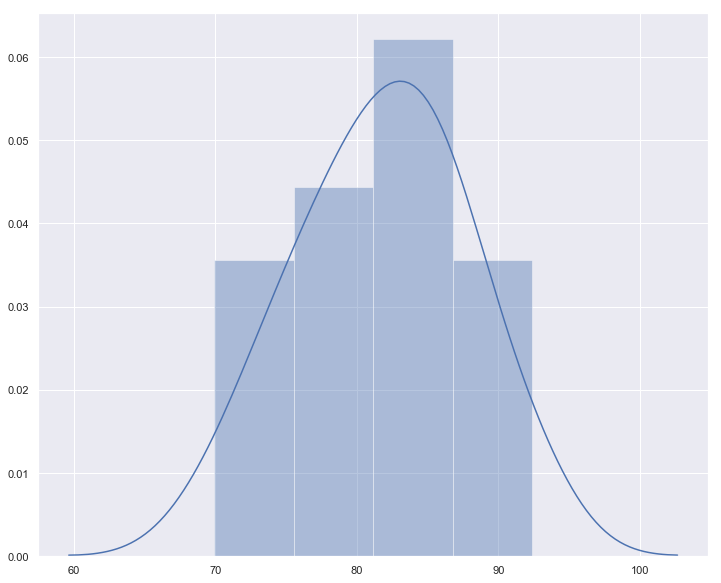

In [25]:
#Their code

online_student_sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])
class_average = 65
a = 0.05

one_sample_ttest(online_student_sample, class_average, a)